In [357]:
import os
from pathlib import Path
import numpy as np
import pickle
import matplotlib.animation as manimation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import sqlite3
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import pandas as pd


In [358]:
dir = r'/Users/janagonzalez/level2/' 
os.chdir(dir)

In [359]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(dir) if isfile(join(dir, f))]
files

['commands.sql', 'patches.pkl', 'test.db', 'origins.mp4']

In [360]:
objects = []
with (open("patches.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [361]:
a = objects[0]

In [362]:
a.shape

(87080, 8)

In [363]:
h = 0.125  # step size in the mesh
x_min = 0.0 
x_max = 1.0
y_min = 0.0 
y_max = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [364]:
a.shape

(87080, 8)

In [365]:
#X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
#a[0:200,0:4]
X = np.unique(a[:,0]).reshape(-1, 1)
print(f'X: {X.shape}')
Y = np.empty((X.shape[0],2))
print(f'Y: {Y.shape}')


X: (1001, 1)
Y: (1001, 2)


In [366]:
stepMin = 113
stepMax = 120 # 500 #600
file = dir + "/origins.mp4"
path = Path(file)
if path.is_file():
    os.remove(file)
FFMpegWriter = manimation.writers["ffmpeg"]
metadata = dict(title="Patches", artist="Matplotlib", comment="AMR Testcase")
writer = FFMpegWriter(fps=10,metadata=metadata)
fig = plt.figure(figsize=(20,10))
colors = ["r", "b", "g", "y", "m", "c"]
ax = fig.add_subplot(111)
frames=stepMax-stepMin+1

#A = a[a[:,7].argsort()[:-1]]
with writer.saving(fig, file, frames):
    for step in range(X.shape[0]):
        if stepMin <= step <= stepMax:
            plt.xlabel("x",labelpad=10)
            plt.ylabel("y",labelpad=10)
            plt.title(f"Level 1 Origins: step {step}")
            plt.grid(True)
            plt.xlim(0.0, 1.0)
            plt.ylim(0.0, 0.5)
            plt.grid(visible=True)
            condition = (a[:,0] == step)
            A = a[condition,1:4]
            condition = (A[:,0] == 1) # only level 1 boxes
            A = A[condition,1:3]
            for origin in range(A.shape[0]):
                #print(f'{origin}: step {A[origin,0]}: {A[origin,1]}')
                plt.scatter(A[origin,0], A[origin,1], color = 'blue')
            writer.grab_frame()
            print(f'wrote step {step}')
            plt.clf()
        
writer.finish()

wrote step 113
wrote step 114
wrote step 115
wrote step 116
wrote step 117
wrote step 118
wrote step 119
wrote step 120


<Figure size 2000x1000 with 0 Axes>

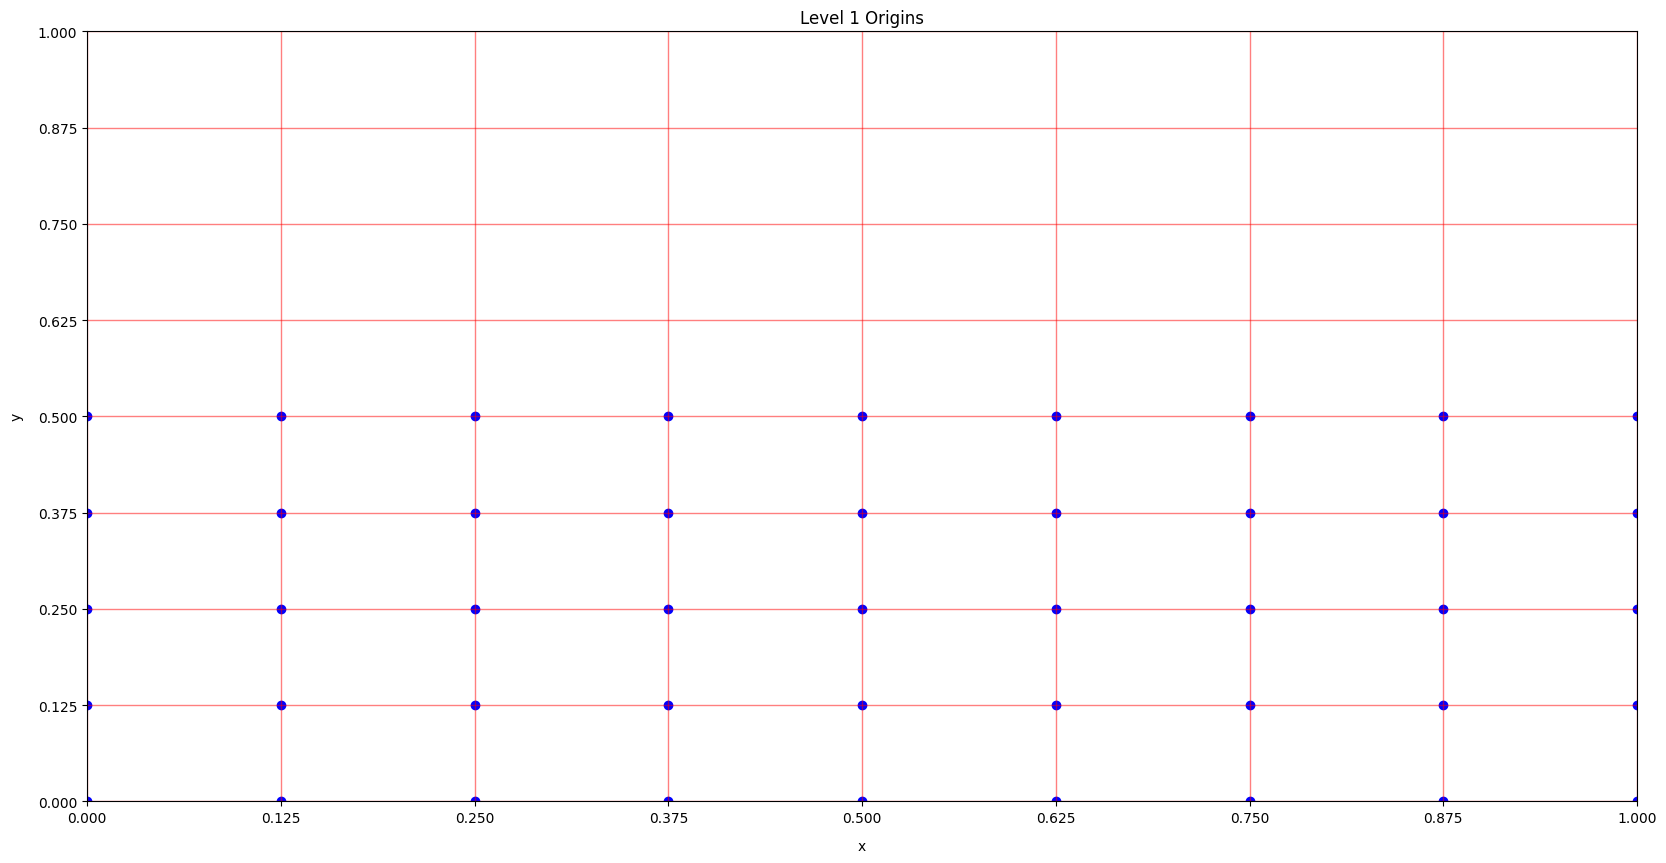

In [367]:
h = 0.125   # step size in the mesh
x_min = 0.0 
x_max = 1.0
y_min = 0.0 
y_max = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h), np.arange(y_min, y_max+h, h))
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("x",labelpad=10)
plt.ylabel("y",labelpad=10)
plt.title(f"Level 1 Origins")
#plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

colors = ["r", "b", "g", "y", "m", "c"]

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(x_min, x_max+h, h)
#minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=h)
#ax.grid(which='major', alpha=h/2)

ax.grid(color='r', linestyle='-', linewidth=1, alpha=0.5)

plt.scatter(xx,yy, color = 'blue')
plt.show()


In [368]:
h = 0.125   # step size in the mesh
x_min = 0.0 
x_max = 1.0
y_min = 0.0 
y_max = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h), np.arange(y_min, y_max+h, h))

rows = xx.shape[0]
cols = xx.shape[1]
X = np.empty((rows * cols, 2))
print(X.shape)
y = np.zeros(rows * cols, dtype=int)


data = np.unique(a[:,0]).reshape(-1, 1)
print(f'data: {data.shape}')
#Y = np.empty((X.shape[0],2))
#print(f'Y: {Y.shape}')

stepMin = 113
stepMax = 113 # 500 #600
i = 0
for step in range(data.shape[0]):
    if stepMin <= step <= stepMax:
        condition = (a[:,0] == step)
        A = a[condition,1:4]
        condition = (A[:,0] == 1) # only level 1 boxes
        A = A[condition,1:3]
        for origin in range(A.shape[0]):
            #print(f'{origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {A[origin,1] * NCOLS + A[origin,0]}')
            offset2 = int(A[origin,1]/h * cols + A[origin,0]/h)
            print(f'x_i {i}, {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]}), 2D offset {offset2}')
            #XX = np.append(XX,i)
            #yy = np.append(yy,offset3)
            y[offset2] = 1
            i += 1

(45, 2)
data: (1001, 1)
x_i 0, 0: step 113, origin (0.0, 0.0), 2D offset 0
x_i 1, 1: step 113, origin (0.0, 0.125), 2D offset 9
x_i 2, 2: step 113, origin (0.0, 0.25), 2D offset 18
x_i 3, 3: step 113, origin (0.0, 0.375), 2D offset 27


In [369]:
kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

In [419]:
fig = plt.figure(figsize=(20,10))
'''
#ax = fig.add_subplot(1, 1, 1)
plt.xlabel("x",labelpad=10)
plt.ylabel("y",labelpad=10)
plt.title(f"Level 1 Origins")
#plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

colors = ["r", "b", "g", "y", "m", "c"]

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(x_min, x_max+h, h)
#minor_ticks = np.arange(0, 101, 5)

ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
#ax.grid(which='minor', alpha=h)
#ax.grid(which='major', alpha=h/2)

ax.grid(color='r', linestyle='-', linewidth=1, alpha=0.5)

plt.scatter(xx,yy, color = 'blue')
#plt.show()
'''
for k, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    print(k)
    print(clf)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    #print(Z)
    print(Z.shape)
    Z = Z.reshape((xx.shape[0], xx.shape[1], 2))

    #print(f'xx: {xx.shape}')
    #print(f'yy: {yy.shape}')
    #print(f'Z: {Z.shape}')

    pad = np.zeros((xx.shape[0], xx.shape[1], 1))
    #print(f'pad: {pad.shape}')

    #ZZ = np.append(Z,pad,axis=2)
    ZZ = np.dstack((Z,pad))
    ZZ[:,:,[2,1]] =  ZZ[:,:,[1,2]]

    print(f'ZZ: {ZZ.shape}')
    
    plt.subplot(1, 2, k + 1)
    plt.xlabel("x",labelpad=10)
    plt.ylabel("y",labelpad=10)
    plt.title(f"Level 1 Origins")
    #plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    major_ticks = np.arange(x_min, x_max+h, h)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')
    


    # pcolormesh needs the pixel edges for x and y
    # and with default flat shading, Z needs to be evaluated at the pixel center
    plot = plt.pcolormesh(xx, yy, ZZ, cmap='RdBu', shading='nearest')
    plt.scatter(xx,yy, color = 'blue')
    ax.grid(color='b', linestyle='-', linewidth=2, alpha=0.9)
    for origin in range(A.shape[0]):
        print(f'x_i {i}, {origin}: step {step}, origin ({A[origin,0]}, {A[origin,1]})')
        plt.scatter(A[origin,0], A[origin,1], c="g", marker='o', s=500)
    # contour needs the centers
    cset = plt.contour(xx, yy, Z[:,:,1], cmap='gray')
    plt.clabel(cset, inline=True)

    plt.colorbar(plot)

plt.show()


0
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))
(45, 2)
(45, 2)


KeyboardInterrupt: 

<Figure size 2000x1000 with 0 Axes>

In [371]:
# for i in range(xx.shape[0]):
#     for j in range(xx.shape[1]):
#         print(f'{i},{j}')
#         print(f'{i*h},{j*h}')

In [372]:
db_file = "test.db"
#sql_file = "commands.sql"

path = Path(db_file)
if path.is_file():
     print(f'removing {db_file}')
     os.remove(db_file)

connection = sqlite3.connect(db_file)
create_table_query = '''CREATE TABLE level1_amr_data 
    (step INTEGER,
    i INTEGER,
    j INTEGER, 
    Prob REAL);'''
cursor = connection.cursor()
cursor.execute(create_table_query)
connection.commit()

removing test.db


In [373]:
# Z = Z.reshape((xx.shape[0], xx.shape[1], 2))

# for i in range(xx.shape[0]):
#     for j in range(xx.shape[1]):
#         #prob_class_0 = Z[i, j, 0]  # Prob of class 0
#         prob_class_1 = Z[i, j, 1]  # Prob of class 1
#         x_value = xx[i, j]
#         y_value = yy[i, j]
#         print(f"Point ({x_value}, {y_value}): Prob(class 1) = {prob_class_1}")

In [374]:
#print(a.shape)
Z = Z.reshape((xx.shape[0], xx.shape[1], 2))
steps = np.unique(a[:,0]).reshape(-1, 1)
for step in range(data.shape[0]):
        #print(step)
        #------------only level 1 boxes-------------
        condition = (a[:,0] == step)
        A = a[condition,1:4]
        condition = (A[:,0] == 1)
        A = A[condition,1:3]
        #print(f'A: {A.shape}')
        for origin in range(A.shape[0]):
            #h_level0 = 0.0078125
            h_level1 = 0.00390625
            #h_level2 = 

            for i in range(xx.shape[0]):
                for j in range(xx.shape[1]):
                    prob_class_1 = Z[i, j, 1]  # Prob of class 1
                    i_value = xx[i, j]*h_level1
                    j_value = yy[i, j]*h_level1
                    #print(f"Point ({x_value}, {y_value}): Prob(class 1) = {prob_class_1}")
            

                    insert_query = '''
                        INSERT INTO level1_amr_data (step, i, j, Prob)
                        VALUES (?, ?, ?, ?)'''        
                    cursor.execute(insert_query, (step, i_value, j_value, prob_class_1))
connection.commit()

In [375]:
print(cset.levels)
for item in cset.collections:
   print('item:')
   print(type(item))
   for i in item.get_paths():
      v = i.vertices
      x = v[:, 0]
      y = v[:, 1]
      print(x, y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
item:
<class 'matplotlib.collections.PathCollection'>
item:
<class 'matplotlib.collections.PathCollection'>
[0.26317314 0.27207641 0.27269348 0.25952482 0.25       0.24518553
 0.2373831  0.17850016 0.125      0.12327705 0.11932016] [0.5        0.375      0.25       0.125      0.09570038 0.11467966
 0.13511525 0.25       0.29986666 0.375      0.5       ]
item:
<class 'matplotlib.collections.PathCollection'>
[0.17236852 0.125      0.11601867 0.1094446  0.10827082 0.10183641
 0.06909944 0.52976948 0.52815553 0.5225943  0.51316059 0.51097413
 0.5        0.49585785] [0.         0.06419333 0.125      0.23965453 0.26034562 0.375
 0.5        0.5        0.375      0.25       0.1353417  0.11466903
 0.02978159 0.        ]
item:
<class 'matplotlib.collections.PathCollection'>
[0.11596836 0.09877303 0.09237072 0.09085023 0.08039576 0.01887872
 0.74082526 0.73834503 0.73390353 0.73288544 0.72604453 0.71557218] [0.         0.125      0.23965435 0.26034003 0.3

/var/folders/11/9bd4x7ks4ysgvdqfp3zkdmd80000gr/T/ipykernel_65448/2225948511.py:2: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for item in cset.collections:


In [376]:
query = "SELECT * FROM level1_amr_data"

In [377]:
df = pd.read_sql_query(query, connection)
connection.close()

print(df)

        step         i         j      Prob
0          0  0.000000  0.000000  0.878075
1          0  0.000488  0.000000  0.254979
2          0  0.000977  0.000000  0.109895
3          0  0.001465  0.000000  0.145848
4          0  0.001953  0.000000  0.201856
...      ...       ...       ...       ...
811435  1000  0.001953  0.001953  0.185663
811436  1000  0.002441  0.001953  0.245864
811437  1000  0.002930  0.001953  0.304288
811438  1000  0.003418  0.001953  0.356480
811439  1000  0.003906  0.001953  0.400322

[811440 rows x 4 columns]


In [427]:
# ---- Jana's Attempt to bounding boxes -----

# Step size and range for the mesh
h = 0.125 #Level 1 
x_min = 0.0
x_max = 1.0
y_min = 0.0
y_max = 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max+h, h), np.arange(y_min, y_max+h, h))

rows = xx.shape[0]
cols = xx.shape[1]
# X = np.empty((rows * cols, 2))
# y = np.zeros(rows * cols, dtype=int)

# Process data and fill y array
i = 0
for step in range(data.shape[0]):
    condition = (a[:,0] == data[step, 0])
    A = a[condition, 1:4]
    condition = (A[:,0] == 1)  # Only level 1 boxes
    A = A[condition, 1:3]
    for origin in range(A.shape[0]):
        offset2 = int(A[origin,1]/h * cols + A[origin,0]/h)
        y[offset2] = 1
        i += 1

fig = plt.figure(figsize=(20, 10))

for k, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    #print(Z)
    #print(Z.shape)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape((xx.shape[0], xx.shape[1], 2))
    pad = np.zeros((xx.shape[0], xx.shape[1], 1))

    ZZ = np.dstack((Z,pad))
    ZZ[:,:,[2,1]] =  ZZ[:,:,[1,2]]

    plt.subplot(1, 2, k + 1)
    plt.xlabel("x",labelpad=10)
    plt.ylabel("y",labelpad=10)
    plt.title(f"Level 1 Origins")
    #plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    major_ticks = np.arange(x_min, x_max+h, h)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid(which='both')

    # pcolormesh needs the pixel edges for x and y
    # and with default flat shading, Z needs to be evaluated at the pixel center
    #Z = np.random.rand(rows, cols)  
    #Z = clf.predict_proba(rows, cols)
    
    # contour needs the centers
    cset = plt.contour(xx, yy, Z[:,:,1], cmap='GnBu_r')
    plt.clabel(cset, inline=True)
    #plt.colorbar(plot)

    # extracting contour lines and creating bounding boxes
    print(cset.levels)
    for item in cset.collections:
        print('item:')
        print(type(item))
        for path in item.get_paths():
            v = path.vertices
            x = v[:, 0]
            y = v[:, 1]
            print(x,y)
            x_min_box, x_max_box = np.min(x), np.max(x)
            y_min_box, y_max_box = np.min(y), np.max(y)
            plt.plot([x_min_box, x_max_box, x_max_box, x_min_box, x_min_box],
                        [y_min_box, y_min_box, y_max_box, y_max_box, y_min_box],
                        color='red', linestyle='--', linewidth=2)

plt.show()


In [ ]:
print(clf)